In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import warnings as wn
wn.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dataset.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [7]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
dataset.shape

(205, 26)

In [9]:
dataset['Car_Company']= dataset['CarName'].apply(lambda x: x.split(' ')[0])

In [10]:
dataset['Car_Company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
porcshce        1
mercury         1
Name: Car_Company, dtype: int64

In [11]:
dataset['Car_Company'].replace('toyouta','toyota',inplace=True)
dataset['Car_Company'].replace('nissan','Nissan',inplace=True)
dataset['Car_Company'].replace('maxda','mazda',inplace=True)
dataset['Car_Company'].replace('vokswagen','volkswagen',inplace=True)
dataset['Car_Company'].replace('vw','volkswagen',inplace=True)
dataset['Car_Company'].replace('porcshce','porsche',inplace=True)

In [12]:
dataset.drop('CarName',axis=1,inplace=True)

In [13]:
dataset.drop('car_ID',axis=1,inplace=True)

In [14]:
dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
num_cols=dataset.select_dtypes(include=['int64','float64'])

In [16]:
obj_cols=dataset.select_dtypes(include=['object'])

In [17]:
obj_cols.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Car_Company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [18]:
def str2int(x):
               return x.map({'four':4, 'two':2})
num_cols['doornumber']=obj_cols[['doornumber']].apply(str2int)

In [19]:
def obj2int(x):
               return x.map({'one':1, 'two':2, 'three':3,'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12})
num_cols['cylindernumber']=obj_cols[['cylindernumber']].apply(obj2int)

In [20]:
obj_cols.drop('doornumber',axis=1,inplace=True)
obj_cols.drop('cylindernumber',axis=1,inplace=True)

In [21]:
new_data=pd.concat([num_cols, obj_cols],axis=1)

In [22]:
new_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumber,cylindernumber,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,Car_Company
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,2,4,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,2,4,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,2,6,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,4,4,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,4,5,gas,std,sedan,4wd,front,ohc,mpfi,audi


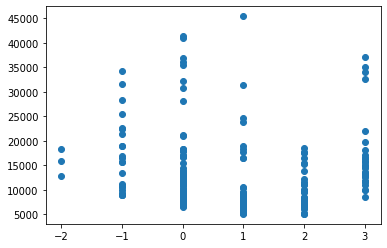

In [23]:
plt.scatter('symboling','price',data=new_data)

<Figure size 1440x864 with 0 Axes>

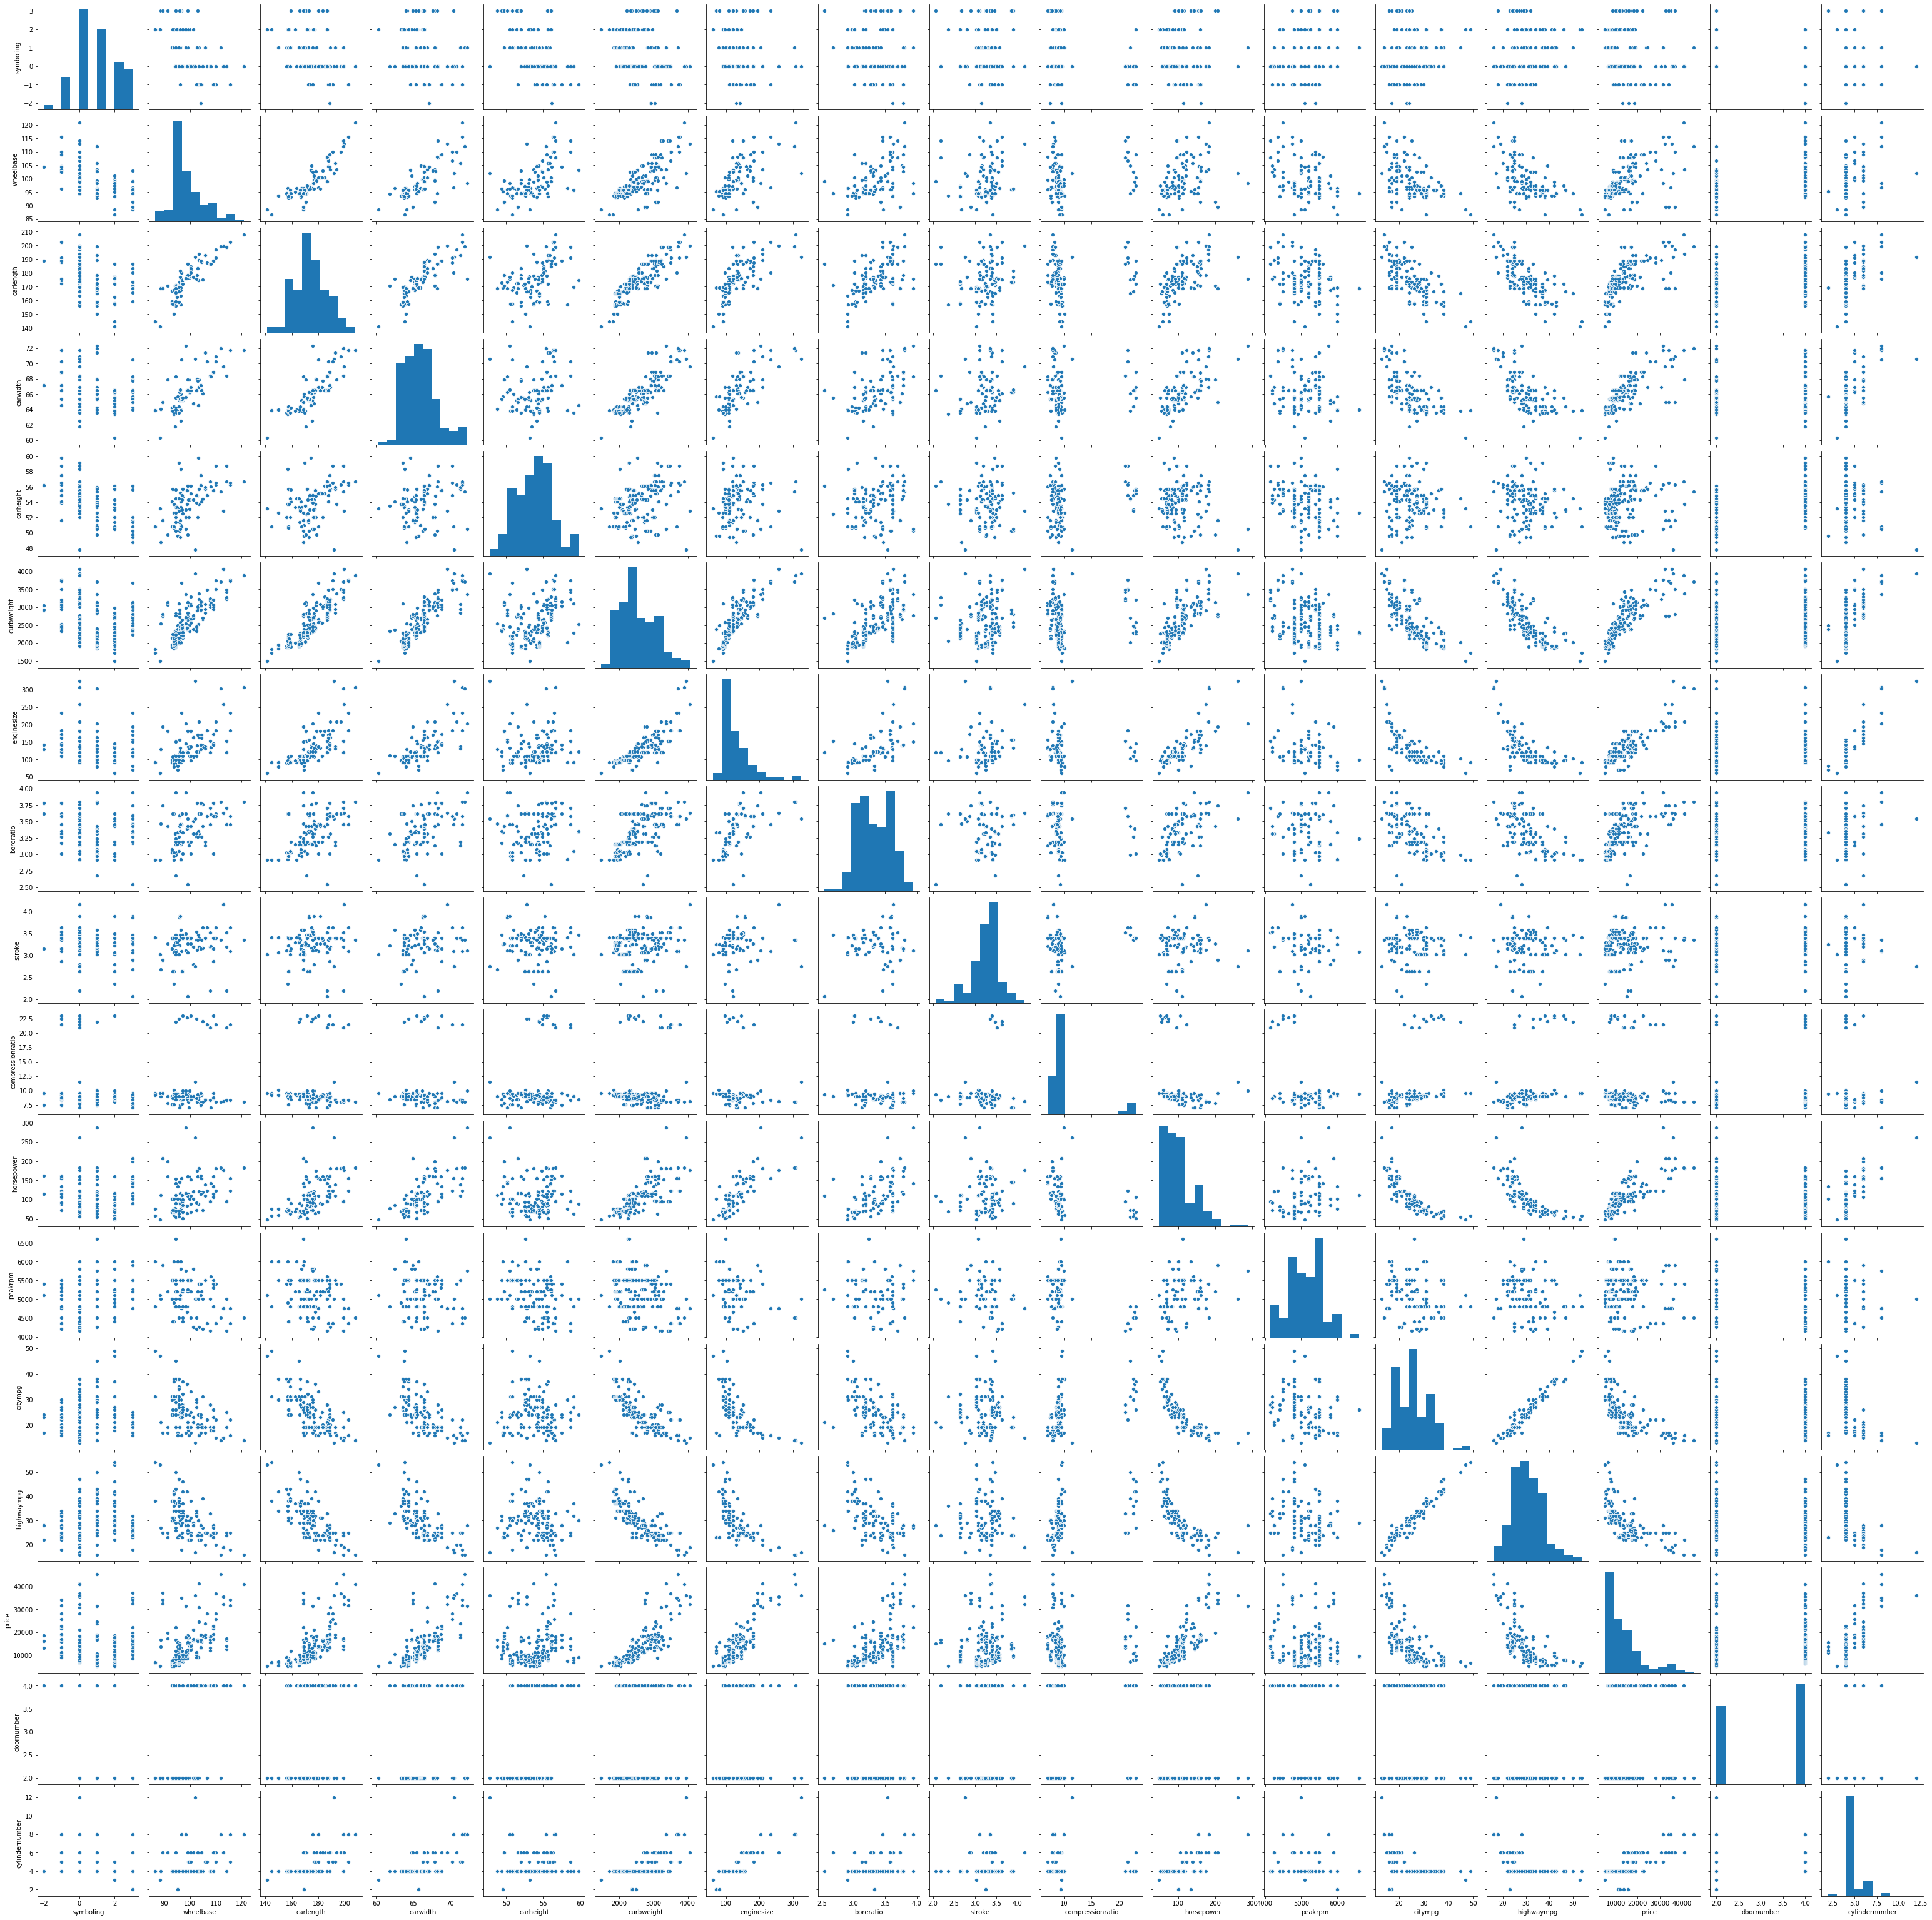

In [24]:
plt.figure(figsize=(20,12))
sns.pairplot(new_data)

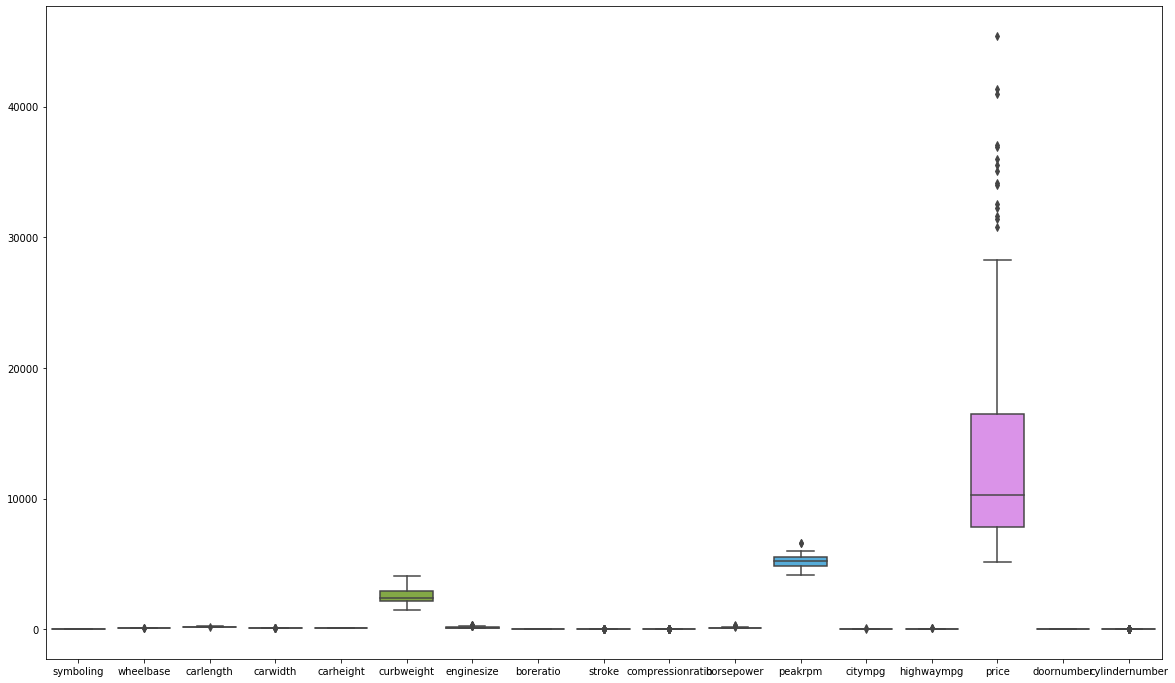

In [25]:
plt.figure(figsize=(20,12))
sns.boxplot(data=new_data)

In [26]:
#from the pairplots, we can see there are multi-collinearities and outliers when independent variables are plotted against price
#Also we need to select the features that are highly related to price. =Let's try using Linear, Ridge and Lasso Regression models and see which would be the best

In [27]:
new_data_objects = new_data.select_dtypes(include=['object'])

In [28]:
new_data_objects.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'Car_Company'],
      dtype='object')

In [29]:
new_data_objects=pd.get_dummies(new_data_objects, drop_first=True)

In [30]:
new_data_objects


,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,Car_Company_mitsubishi,Car_Company_peugeot,Car_Company_plymouth,Car_Company_porsche,Car_Company_renault,Car_Company_saab,Car_Company_subaru,Car_Company_toyota,Car_Company_volkswagen,Car_Company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
final_data = pd.concat([new_data,new_data_objects], axis=1)

In [32]:
final_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Car_Company_mitsubishi,Car_Company_peugeot,Car_Company_plymouth,Car_Company_porsche,Car_Company_renault,Car_Company_saab,Car_Company_subaru,Car_Company_toyota,Car_Company_volkswagen,Car_Company_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,0,0,1
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,0,0,1
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
final_data.drop('fueltype', axis=1,inplace=True)
final_data.drop('aspiration', axis=1,inplace=True)
final_data.drop('carbody', axis=1,inplace=True)
final_data.drop('drivewheel', axis=1,inplace=True)
final_data.drop('enginelocation', axis=1,inplace=True)
final_data.drop('enginetype', axis=1,inplace=True)
final_data.drop('fuelsystem', axis=1,inplace=True)
final_data.drop('Car_Company', axis=1,inplace=True)

In [34]:
final_data.shape

(205, 60)

In [35]:
y=final_data.pop('price')
x=final_data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3,random_state=100)

In [72]:
las_reg=Lasso(alpha=5, normalize=True)

In [73]:
las_reg.fit(X_train,y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

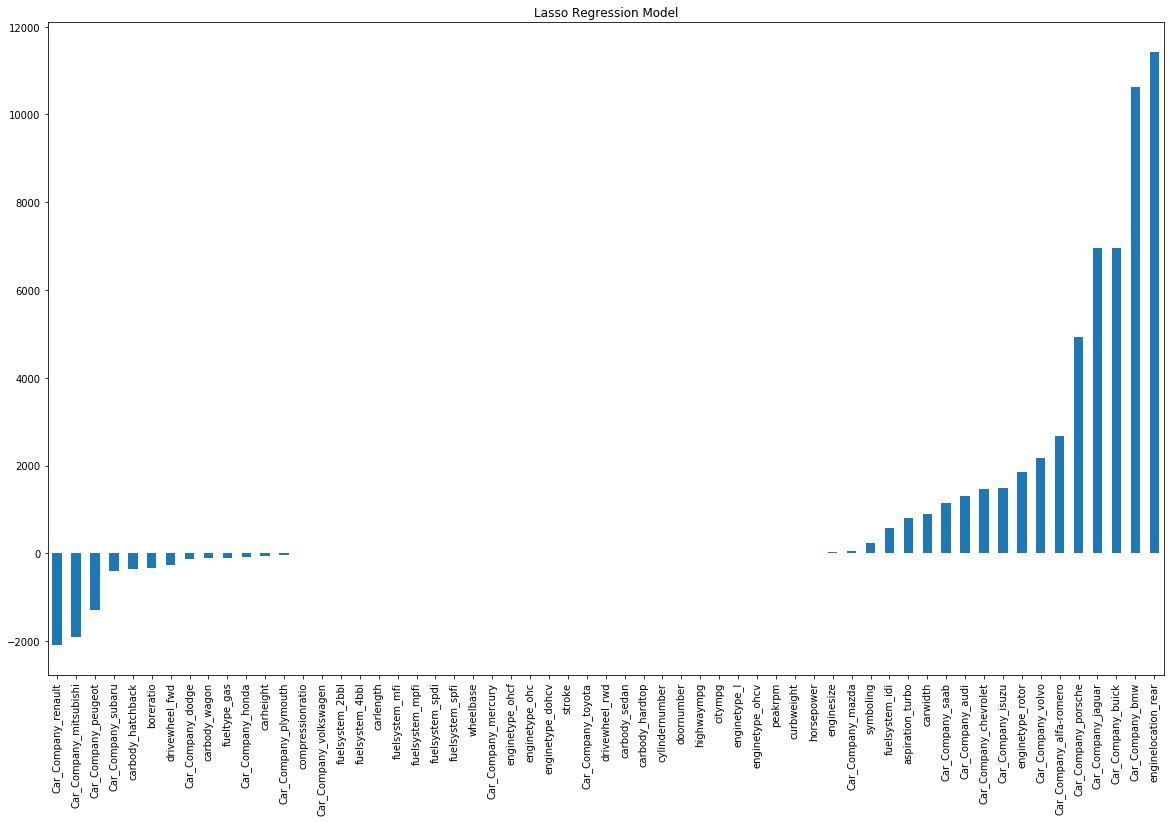

In [74]:
from sklearn.metrics import r2_score
plt.figure(figsize=(20,12))
predictors=X_train.columns
coef_lasso=pd.Series(las_reg.coef_,predictors).sort_values()
coef_lasso.plot(kind='bar',title='Lasso Regression Model')

In [75]:
y_lasso_predict=las_reg.predict(X_test)
print(r2_score(y_test,y_lasso_predict))

0.9174061165359035


In [76]:
Rid_reg=Ridge(alpha=5, normalize=True)
Rid_reg.fit(X_train,y_train)


Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

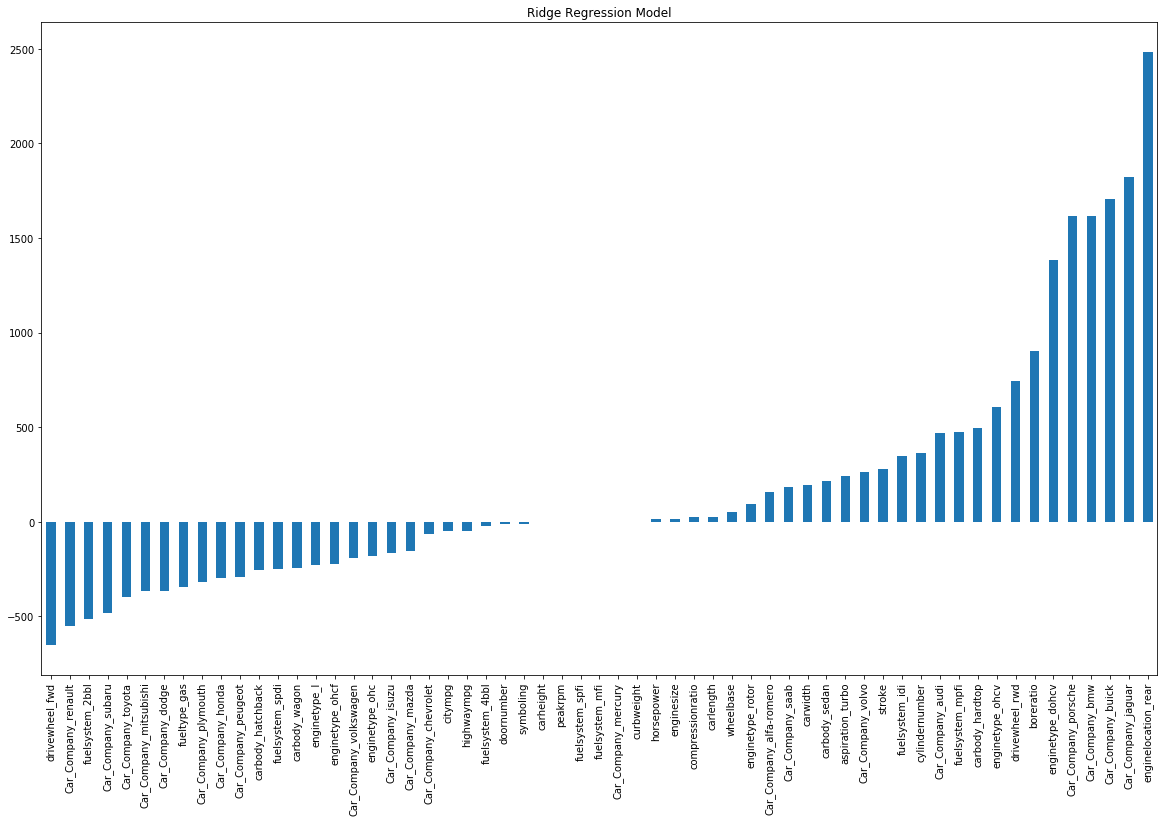

In [77]:
Ridge_predictors=X_train.columns
plt.figure(figsize=(20,12))
Ridge_coef=pd.Series(Rid_reg.coef_,Ridge_predictors).sort_values()
Ridge_coef.plot(kind='bar', title='Ridge Regression Model')

In [78]:
Rid_reg_predict = Rid_reg.predict(X_test)
print(r2_score(y_test,Rid_reg_predict))

0.6911075191501987


In [79]:
#From the plots and r2 scores, we see that Lasso Regression performs better than Ridge Regression and it selects features that are highly correlated with price.
#Ridge regression does not bring the coefficients down to zero. 

In [80]:
Pred_DF = pd.DataFrame({'Predicted':y_lasso_predict, 'Actual':y_test})

In [81]:
Pred_DF.head(45)

,Predicted,Actual
160,7257.120914,7738.0
186,10061.900233,8495.0
59,10953.744216,8845.0
165,9809.004249,9298.0
140,6999.321243,7603.0
64,10753.430803,11245.0
198,18114.823860,18420.0
75,17021.275946,16503.0
172,14225.608670,17669.0
104,18841.238938,17199.0


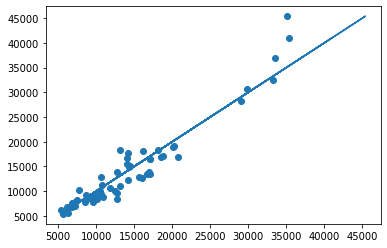

In [82]:
plt.scatter(y_lasso_predict,y_test)
plt.plot(y_test,y_test)

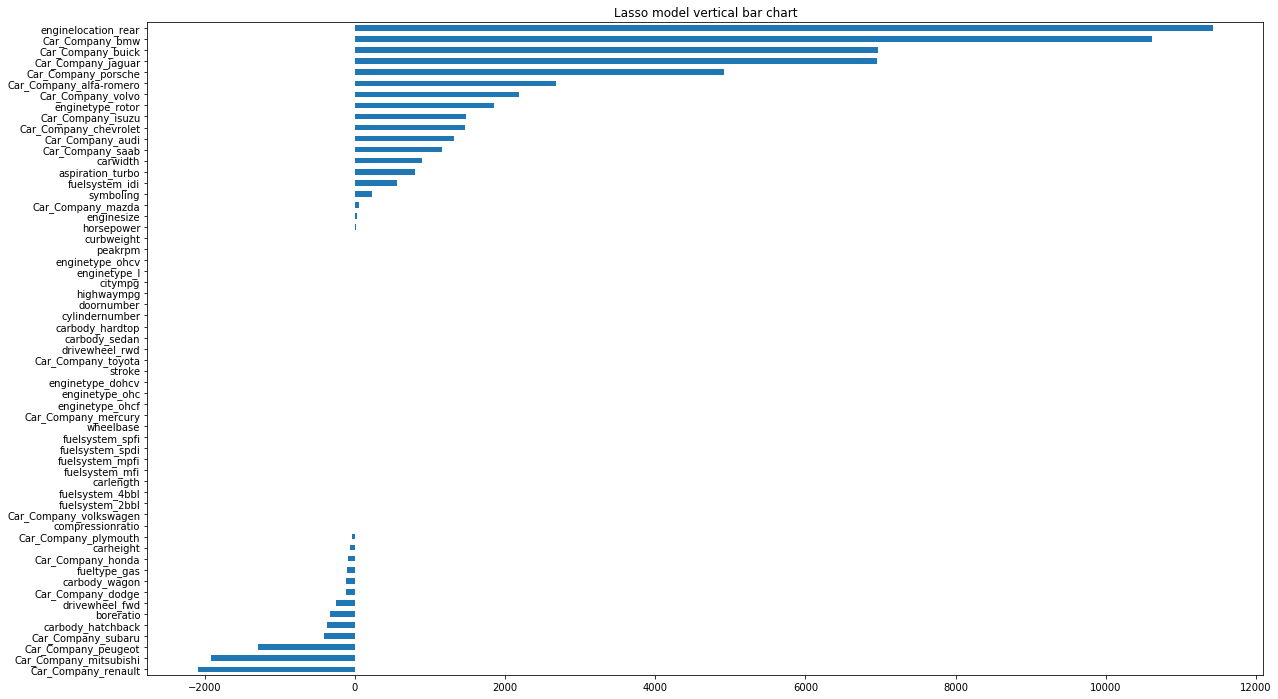

In [85]:
plt.figure(figsize=(20,12))
coef_lasso.plot(kind='barh',title='Lasso model vertical bar chart')

In [ ]:
#from the bar plots (both vertical and horizontal) of lasso, we can see enginelocation_rear, Car_Company_bmw, Car_Company_buick, 
#Car_Company_jaguar, and Car_Company_Porsche contribute highly towards price.